In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os
import seaborn as sns
import cv2
import numpy as np
import os
import imghdr
import tensorflow.keras.models import load_model

C:\Users\Peter Bryan Mao\AppData\Local\Temp\ipykernel_4192\2081103592.py:10: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [40]:
model = load_model('Smoking_kill_you.h5')

### DATA PREPARATION AND VISUALIZATION

In [2]:
data_dir = "Smoking"

image_ext = ['jpeg','jpg','bmp','png']

In [3]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_ext:
                os.remove(image_path)
        except Exception as e :
            print("Issues")

In [4]:
data = tf.keras.utils.image_dataset_from_directory("Smoking", batch_size=64)

Found 1204 files belonging to 2 classes.


#### VISUALIZATION

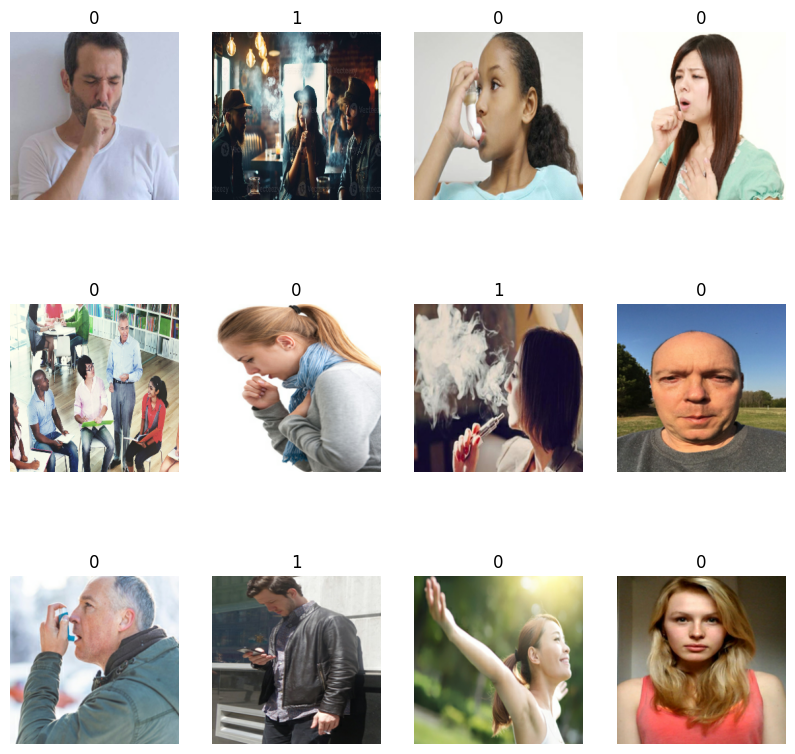

In [5]:
plt.figure(figsize=(10, 10))
for images, labels in data.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [6]:
data_iterator = data.as_numpy_iterator()

In [7]:
batch = data_iterator.next()

In [8]:
batch[0].shape

(64, 256, 256, 3)

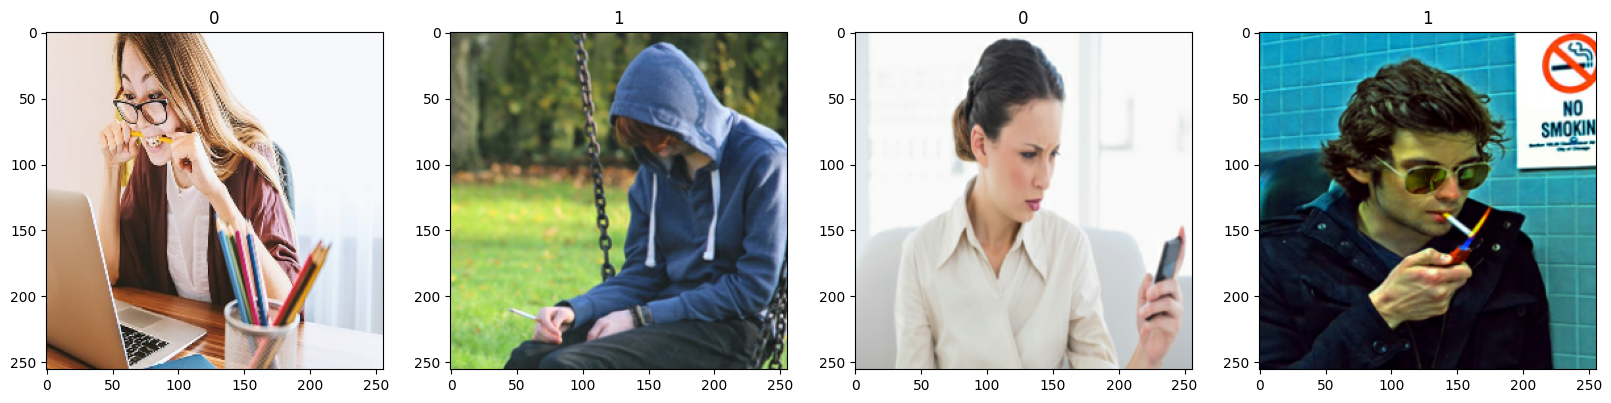

In [9]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for label, image in enumerate(batch[0][:4]):
    ax[label].imshow(image.astype(int))
    ax[label].title.set_text(batch[1][label])

### DATA PRE-PROCESSING

#### FEATURE SCALING

In [10]:
data = data.map(lambda x, y: (x/255,y))

In [11]:
data.as_numpy_iterator().next()[0].max()

1.0

#### DATA SPLIT

In [12]:
train_size = int(len(data)*.7)
valid_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [13]:
train = data.take(train_size)
valid = data.skip(train_size).take(valid_size)
test = data.skip(train_size+valid_size).take(test_size)

### MODEL BUILDING

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.losses import BinaryCrossentropy

In [15]:
model = Sequential()

In [16]:
model.add(Conv2D(16,(3,3), 1, activation='relu', input_shape= (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation= 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

c:\Users\Peter Bryan Mao\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [17]:
model.compile('adam', loss= BinaryCrossentropy(), metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

#### TRAIN MODEL

In [19]:
logdir = 'logs'
callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [20]:
res = model.fit(train,batch_size=64, epochs=30, validation_data=valid, callbacks=[callback])

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 772ms/step - accuracy: 0.5566 - loss: 0.9222 - val_accuracy: 0.7292 - val_loss: 0.6127
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 704ms/step - accuracy: 0.6663 - loss: 0.6180 - val_accuracy: 0.7188 - val_loss: 0.5416
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 775ms/step - accuracy: 0.6957 - loss: 0.5674 - val_accuracy: 0.7708 - val_loss: 0.4952
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.7586 - loss: 0.4822 - val_accuracy: 0.6823 - val_loss: 0.5779
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 814ms/step - accuracy: 0.7655 - loss: 0.4843 - val_accuracy: 0.8073 - val_loss: 0.4298
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 665ms/step - accuracy: 0.7977 - loss: 0.4474 - val_accuracy: 0.8281 - val_loss: 0.3845
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 799ms/step - accuracy: 0.8496 - loss: 0.3332 - val_accuracy: 0.9010 - val_loss: 0.2925
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 662ms/step - accuracy: 0.8993 - loss: 0.2798 - val_accurac

<function matplotlib.pyplot.show(close=None, block=None)>

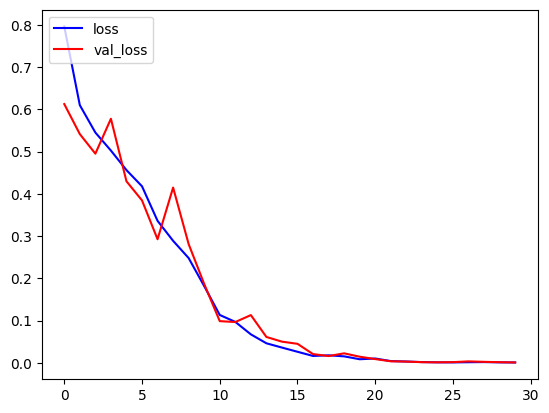

In [21]:
fig = plt.Figure()
plt.plot(res.history['loss'], color='blue', label='loss')
plt.plot(res.history['val_loss'],color='red',label='val_loss')
plt.legend(loc="upper left")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

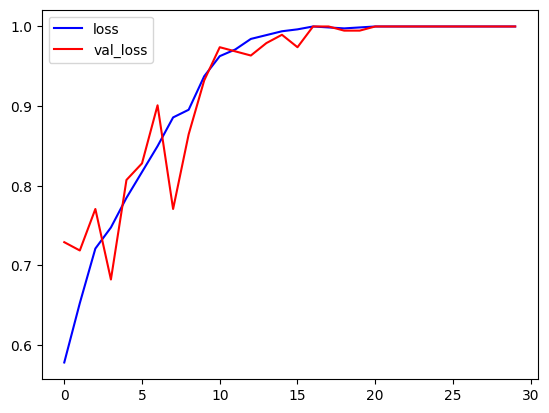

In [22]:
fig = plt.Figure()
plt.plot(res.history['accuracy'], color='blue', label='loss')
plt.plot(res.history['val_accuracy'],color='red',label='val_loss')
plt.legend(loc="upper left")

plt.show

In [23]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [24]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [25]:
len(test)

1

In [26]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


In [27]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Acuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Acuracy:1.0


#### TESTING USING IMAGE

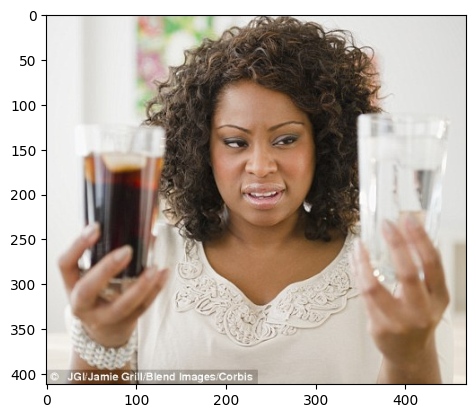

In [33]:
img = cv2.imread('article-2033153-0DAF831C00000578-995_468x412.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.show()

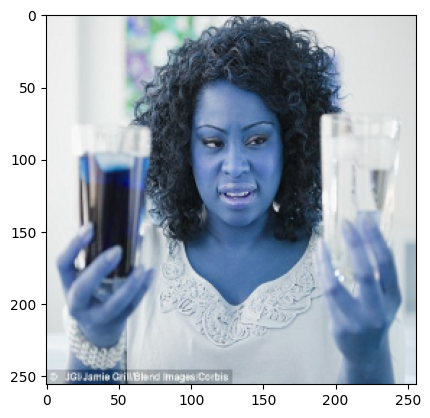

In [34]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))

plt.show()

In [41]:
testing = model.predict(np.expand_dims(resize/255,0))
testing

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


array([[9.9400616e-08]], dtype=float32)

In [36]:
if testing > 0.5 :
    print("Is Smoking")
else :
    print("Is not Smoking")

Is not Smoking


In [38]:
from tensorflow.keras.models import load_model

In [39]:
model.save('Smoking_kill_you.h5')